In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
import pandas as pd
import seaborn as sns

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

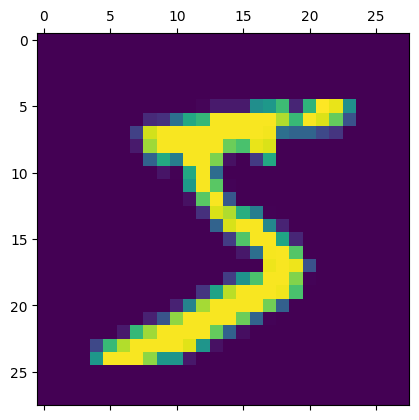

In [3]:
plt.matshow(x_train[0])

In [4]:
image_1 = x_train[0]
label_1 = y_train[0]

image_1_df = pd.DataFrame(image_1)
image_1_df = pd.DataFrame(image_1)


print(f'Label: {label_1}')
print(image_1_df)


Label: 5
    0   1   2   3    4    5    6    7    8    9   ...   18   19   20   21  \
0    0   0   0   0    0    0    0    0    0    0  ...    0    0    0    0   
1    0   0   0   0    0    0    0    0    0    0  ...    0    0    0    0   
2    0   0   0   0    0    0    0    0    0    0  ...    0    0    0    0   
3    0   0   0   0    0    0    0    0    0    0  ...    0    0    0    0   
4    0   0   0   0    0    0    0    0    0    0  ...    0    0    0    0   
5    0   0   0   0    0    0    0    0    0    0  ...  175   26  166  255   
6    0   0   0   0    0    0    0    0   30   36  ...  225  172  253  242   
7    0   0   0   0    0    0    0   49  238  253  ...   93   82   82   56   
8    0   0   0   0    0    0    0   18  219  253  ...    0    0    0    0   
9    0   0   0   0    0    0    0    0   80  156  ...    0    0    0    0   
10   0   0   0   0    0    0    0    0    0   14  ...    0    0    0    0   
11   0   0   0   0    0    0    0    0    0    0  ...    0    0    

In [5]:
# SCALING

In [6]:
x_train = x_train / 255
x_test = x_test / 255

In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
inputs_train = x_train.shape[0]
inputs_test = x_test.shape[0]
print(inputs_test)

10000


In [11]:
x_train_oneD = x_train.reshape(inputs_train, 28*28)
x_test_oneD = x_test.reshape(inputs_test, 28*28)

In [12]:
x_train_oneD[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
model = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(10, activation='softmax')

])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_oneD, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8982 - loss: 0.3338
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9733 - loss: 0.0896
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9811 - loss: 0.0624
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9848 - loss: 0.0477
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9865 - loss: 0.0418


In [14]:
model.evaluate(x_test_oneD, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.9679 - loss: 0.1273


[0.11184778809547424, 0.972599983215332]

In [15]:
y_predicted = model.predict(x_test_oneD)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step


In [16]:
y_predicted[0]

array([3.1729092e-10, 6.5703081e-12, 7.8673838e-11, 3.8345389e-09,
       1.6208217e-08, 8.5106988e-10, 4.6638934e-15, 9.9999845e-01,
       4.0647063e-09, 1.5985597e-06], dtype=float32)

In [17]:
y_predicted = model.predict(x_test_oneD)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    0,    0,    0,    1,    1,    0,    0,    1],
       [   0, 1125,    3,    1,    0,    0,    3,    1,    1,    1],
       [  25,    6,  966,    3,    7,    0,    2,   14,    9,    0],
       [   1,    0,    2,  977,    0,   18,    0,    4,    3,    5],
       [   1,    1,    2,    0,  965,    2,    7,    1,    1,    2],
       [   4,    0,    0,    3,    0,  878,    3,    0,    4,    0],
       [  10,    1,    0,    1,    1,    7,  935,    1,    2,    0],
       [   2,    5,    4,    2,    3,    0,    0, 1005,    3,    4],
       [   9,    1,    0,    2,    1,    8,    0,    2,  943,    8],
       [   9,    3,    0,    0,   27,    7,    1,    4,    3,  955]],
      dtype=int32)>

In [18]:
# Convert to DataFrame for better visualization
df_cm = pd.DataFrame(cm, 
                     index=[f'True {i}' for i in range(10)], 
                     columns=[f'Pred {i}' for i in range(10)])

# Display the DataFrame (prints as a table)
print(df_cm)

        Pred 0  Pred 1  Pred 2  Pred 3  Pred 4  Pred 5  Pred 6  Pred 7  \
True 0     977       0       0       0       0       1       1       0   
True 1       0    1125       3       1       0       0       3       1   
True 2      25       6     966       3       7       0       2      14   
True 3       1       0       2     977       0      18       0       4   
True 4       1       1       2       0     965       2       7       1   
True 5       4       0       0       3       0     878       3       0   
True 6      10       1       0       1       1       7     935       1   
True 7       2       5       4       2       3       0       0    1005   
True 8       9       1       0       2       1       8       0       2   
True 9       9       3       0       0      27       7       1       4   

        Pred 8  Pred 9  
True 0       0       1  
True 1       1       1  
True 2       9       0  
True 3       3       5  
True 4       1       2  
True 5       4       0  
True 6    

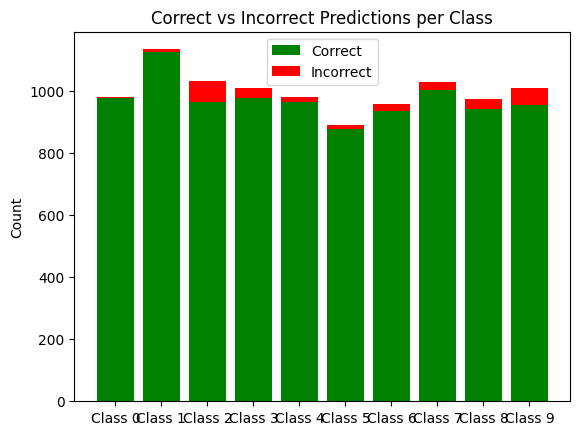

In [19]:
correct = np.diag(cm)
incorrect = np.sum(cm, axis=1) - correct

labels = [f'Class {i}' for i in range(10)]

plt.bar(labels, correct, color='green', label='Correct')
plt.bar(labels, incorrect, bottom=correct, color='red', label='Incorrect')

plt.ylabel('Count')
plt.title('Correct vs Incorrect Predictions per Class')
plt.legend()

plt.show()

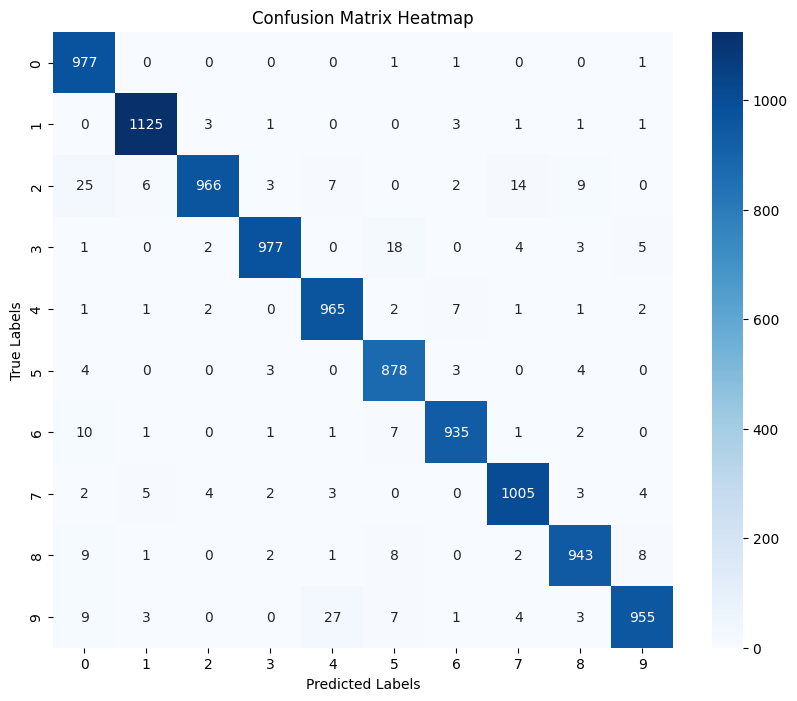

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

# Show the plot
plt.show()